# Problématique
## Mandat 1 (Probabilités)
### Machine à sous
i) Afin de déterminer quelle machine à le plus de chance d'offrir un pouvoir au joueur entre la machine 1 (3 roues ayant chacune 8 pictogramemes) et la machine 2 (4 roues ayant chacunes 5 pictogrammes), il suffit d'utiliser les technique de dénombrements afin de déterminer les probabilité que chaque roue s'arrêtent sur un même pictogramme. Ce faisant on trouve que la machine ayant le plus de chance d'offrir un pouvoir est la machine 1.


In [1]:
import numpy as np

# 3 roues avec 8 pictogrammes
prob_machine_1 = (1/8)**3
print(f'Probabilité machine 1 : {prob_machine_1}')
# 4 roues avec 5 pictogrammes
prob_machine_2 = (1/5)**4
print(f'Probabilité machine 2 : {prob_machine_2}')


Probabilité machine 1 : 0.001953125
Probabilité machine 2 : 0.0016000000000000003


ii) Afin de déterminer  les probabilités d'obtenir un pouvoir lorsque toutes les roues s'arrêtent sur un pictogramme différent, il suffit de faire appel aux permutations puisqu'il s'agit d'un arrangement ordonné.

In [2]:
import math
n_1, n_2 = 8, 5
r_1, r_2 = 3, 4
permutation_machine_1 = math.factorial(n_1)/math.factorial(n_1 - r_1)
permutation_machine_2 = math.factorial(n_2)/math.factorial(n_2 - r_2)

print(f'La probabilité de la machine 1 est : {permutation_machine_1/512 * 100}%')
print(f'La probabilité de la machine 2 est : {permutation_machine_2/512 * 100}%')


La probabilité de la machine 1 est : 65.625%
La probabilité de la machine 2 est : 23.4375%


iii) Afin de déterminer les probabilité d'obtenir un pouvoir lorsque l'on réussi à avoir le même pictogramme sur toutes les roues au moins deux fois sur 5 lancés, il faut utiliser la fonction de masse de la loi binomiale... À compléter

In [3]:
probabilite_1 = (1 - (math.comb(5, 0) * (prob_machine_1**0)*(1-prob_machine_1)**5 +
                 math.comb(5,1)*(prob_machine_1**1)*(1-prob_machine_1)**4))
moy_1 = 5*prob_machine_1
var_1 = moy_1*(1-prob_machine_1)
print("Probalilité de la machine 1", probabilite_1)
print("Moyenne de la variable aléatoire (Machine 1)" ,moy_1)
print("Variance de la variable aléatoire (Machine 1)",var_1)
probabilite_2 = 1 - (math.comb(5, 0) * (prob_machine_2**0)*(1-prob_machine_2)**5 +
                math.comb(5,1)*(prob_machine_2**1)*(1-prob_machine_2)**4)

moy_2 = 8*prob_machine_2
var_2 = moy_2*(1-prob_machine_2)
print("Probalilité de la machine 2", probabilite_2)
print("Moyenne de la variable aléatoire (Machine 2)" ,moy_2)
print("Variance de la variable aléatoire (Machine 2)",var_2)

3.799817920935311e-05
0.009765625
0.009746551513671875
2.5518178262351476e-05
0.012800000000000002
0.012779520000000003


### Ouverture de la porte
....

## Mandat no 2 : Statistiques

i) Un échantillon présentant des temps de jeu de joueurs est présenté dans le fichier "TempsDeJeux.txt".Les statistique descriptives ont été calculés et sont présentées dans le tableau ci-bas.


In [ ]:
from statistics import mode
import pandas as pd
file = np.loadtxt('TempsDeJeu.txt')
nbEchantillons = len(file)
moyenne = np.mean(file)
print(f'Moyenne : {moyenne}')
medianne = np.median(file)
print(f'Medianne : {medianne}')
mode = mode(file)
print(f'Mode : {mode}')
std = np.std(file)
print(f'Écart type : {std}')
var = std**2
print(f'Variance : {var}')
min = np.min(file)
print(f'Min : {min}')
max = np.max(file)
print(f'Max : {max}')
etendue = max - min
print(f'Étendue : {etendue}')

data = {
    'Statistique': ['Moyenne échantillonnale', 'Médiane', 'Mode', 'Écart type', 'Variance', 'Minimum', 'Maximum', 'Étendue'],
    'Valeur': [moyenne, medianne, mode_value, std, var, min_val, max_val, etendue]


}
pd.DataFrame(data)


ii) Un histogramme a été créer en utilisant le tableau ci-bas. Afin de déterminer le nombre de classes à utiliser dans l'historamme, la racine carrée du nombre d'échantillons a été utiliser. Il suffisait alors de déterminer des limites pour les classes qui faisaient du sens avec le min et le max de la population et de compter l'occurence pour chaque classe.

In [4]:


classes = []
limites_min = []
limites_max = []
centres = []
frequences = []
frequences_relative = []
frequences_cumul = []
cumul = 0
for i in range(0, int(np.sqrt(len(file)))):
    classes.append(i)
    limites_min.append(min + i*(24))
    limites_max.append(min + (i+1)*(24))
    centres.append((limites_min[i] + limites_max[i])/2)
    occurence = 0
    for k in file:
        if k >= limites_min[i] and k < limites_max[i]:
            occurence += 1
            cumul += 1
    frequences.append(occurence)
    frequences_relative.append(occurence/len(file))
    frequences_cumul.append(cumul)
bigasstab = [classes, limites_min, limites_max, centres, frequences, frequences_relative, frequences_cumul]


pd.DataFrame(np.transpose(bigasstab), columns=['Classes', 'Limites_min', 'Limites_max', 'Centres', 'Frequences', 'Frequences relative', 'Frequences cumulative'])

Moyenne : 280.58
Medianne : 279.0
Mode : 291.0
Écart type : 50.12448104469512
Variance : 2512.463600000001
Min : 148.0
Max : 382.0
Étendue : 234.0


,Classes,Limites_min,Limites_max,Centres,Frequences,Frequences relative,Frequences cumulative
0,0.0,148.0,172.0,160.0,2.0,0.02,2.0
1,1.0,172.0,196.0,184.0,3.0,0.03,5.0
2,2.0,196.0,220.0,208.0,6.0,0.06,11.0
3,3.0,220.0,244.0,232.0,8.0,0.08,19.0
4,4.0,244.0,268.0,256.0,21.0,0.21,40.0
5,5.0,268.0,292.0,280.0,22.0,0.22,62.0
6,6.0,292.0,316.0,304.0,15.0,0.15,77.0
7,7.0,316.0,340.0,328.0,9.0,0.09,86.0
8,8.0,340.0,364.0,352.0,8.0,0.08,94.0
9,9.0,364.0,388.0,376.0,6.0,0.06,100.0


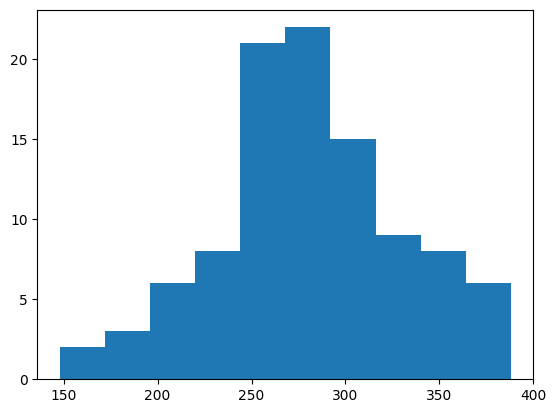

In [5]:
import matplotlib.pyplot as plt

plt.hist(file, bins=range(int(min), int(max) +24, 24))
plt.title("Histogramme du temps de jeux des joueurs")
plt.xlabel("Temps (minutes)")
plt.ylabel("Nombre de joueurs")
plt.show()

iii) En utilisant les tables de la distributions normale, un intervale de confiance sur la moyenne a été calculée avec un niveau de confiance de 95 %

In [6]:
interval_borne_min = moyenne-1.96*std/np.sqrt(100)
interval_borne_max = moyenne+1.96*std/np.sqrt(100)
print(f'{interval_borne_min} <= u <= {interval_borne_max}')

270.7556017152397 <= u <= 290.40439828476025


iv) Le patron du jeux vidéo estime que le temps moyen de jeu des joueurs est d'au moins 5h (300 minutes). Afin de valider ou non cette hyptohese, un test d'hypothèse sera effectuer.On a donc:
  $μ_0 = 500$
  $H_0 =\mu\ge\mu_0$
  $H_1 = \mu < \mu_0$
Nous utiliserons la statistique de test $Z_0 = (\bar{X} - \mu_0)/(\sigma / \sqrt n)$ puisque la variance est connue (point i)
Afin de rejeter ou non l'hypothèse $H_0$, il suffit alors d'utiliser le Critère de rejet de $H_0$: $Z_0 < -Z_\alpha$ ou $Z_\alpha = 1.96$ avec un niveau de confiance de 95%

In [ ]:
U0 = 500
#calcul de Z0
Z0 = (moyenne - U0)/((std/np.sqrt(nbEchantillons)))
Za = 1.96
if Z0 < Za * -1:
    print("L'hypotèse est rejetée")
else:
    print("L'hypothèse est retenue")



L'erreur de première espece est la probabilité de rejeter à tort l'hypothèse émise :
$P(rejeter\; H_0 | H_0\;est\;vraie)$
$P(\bar{X} < 500 | \mu = 500)$
$P( Z < (500-280.58)/(50.1244/ \sqrt100))$